In [44]:
%%html 
<link href="https://fonts.googleapis.com/css?family=Open+Sans" rel="stylesheet">
<style>#notebook-container{font-size: 13pt;font-family:'Open Sans', sans-serif;} div.text_cell{max-width: 104ex;}</style>

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

# Classifying Iris Species

This is the first machine learning algorithm we will study.

## Problem statement

**Data**

The data set contains species of some iris flowers that are found. It contains some measurements associated with each iris:

* Width of the petal
* Length of the petal
* Length of the sepal
* Width of the sepal

All measurements are in `cm`.

The different species that are contained in this data set are: 

* Setosa
* Versicolor
* Virginica

**Goal** 

The goal is to create a machine learning model that can learn from the data and predict the species for a new iris.

**Type of Problem**

Because we have measurements for which we known the correct species of iris, this is a _supervised learning_ problem. In this problem, we want to predict on of several options (the species of iris). This is an example of a _classification_ problem.

The possible outputs are called the _classes_. This problem is a three-class classification problem. The desired output for a single data points (an iris) is the species of the flower. For a particular data point, the species it belongs to is called its _label_.

## Dataset

We will be using the Iris dataset that is included in `scikit-learn`.

In [3]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [4]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [14]:
print(iris_dataset['DESCR'][:981])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================


In [15]:
print('Target names {}'.format(iris_dataset['target_names']))

Target names ['setosa' 'versicolor' 'virginica']


In [16]:
print('Feature names: \n{}'.format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [17]:
print('Shape of data: {}'.format(iris_dataset['data'].shape))

Shape of data: (150, 4)


In [20]:
print('Target: \n{}'.format(iris_dataset['target']))

Target: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Training and Test Data

We want to build a machine learning model from this data that can predict the species of iris for a new set of measurements.

The data should be split up in training and testing data. If we use all the data for our model then it will simply remember all the data points and always predict the correct label. This "remembering" does not indicate that our model will _generalize_ well (in other words, perform well on new data). 

One part of the dataset is used to build our machine learning model, and is called the _training data_ or _training set_.  the rest of the data will be used to assess how well the model works; this is called the _test data_, _test set_, _hold-out set_.

The package `scikit-learn` contains a function that shuffles the dataset and splits it: the `train_test_split` function. This function extract 75% of the rows in the data as the training set. The remaining 25% as is declared as the test set.

In `scikit-learn` data is usually denoted with a capital $X$ (multi-dimensional), while labels are denoted lowercase $y$ (one-dimension). This follows the standard formulation of $f(x)=y$ in mathematics.

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [22]:
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [23]:
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


## Look at the Data

Before building a machine learning model we should inspect the data and see if the task is solvable without machine learning or if the desired information might not be contained in the data.

The easiest way to do this is using a _scatter plot_. However, it is difficult to plot datasets with more than three features this way. One way around this problem is to do a _pair plot_, which looks at all possible pairs of features. Keep in mind that the pair plot does not show all the interactions of all features at once, so some interesting aspects about the data may not be revealed when visualizing it this way.

In [25]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

<IPython.core.display.Javascript object>


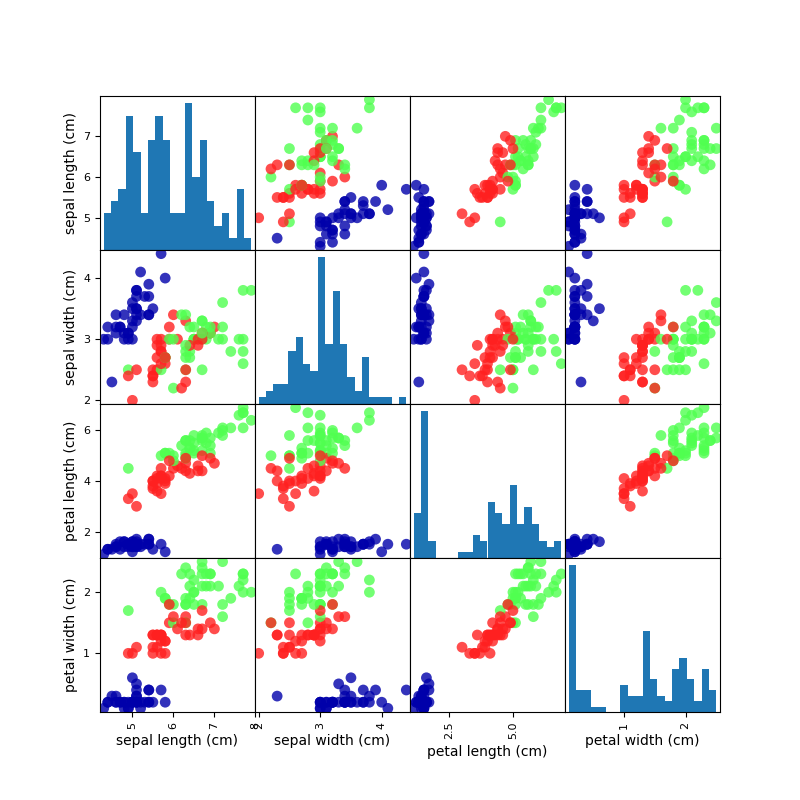

In [33]:
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(8, 8),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=0.8, cmap=mglearn.cm3);

From the plots, we can see that the three classes seem to be relatively well seperated using the sepal and petal measurements. This means that machine learning model will be able to learn to seperate them.

## Building the Model: k-Nearest Neighbors

Now we can start building the actual machine learning model. There are many classification algorithm in `scikit-learn` but here we will use a _k_-nearest neighbour classifier.

The _k_ in _k_-nearest neighbours signifies that instead of using only the closest neighbour to the new data point, we can consider any fixed number _k_ of nearest neighbours.

All machine learning models in `scikit-learn` are implemented in their own classes, which are called `Estimator` classes. The _k_-nearest neighbor algorithm is implemented in the `KNeighborsClassifier` class in the `neighbors` module.

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

To build the model on the training dataset, we call the `fit` method of the `knn` object.

In [48]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

## Making Predictions

We can now make predictions using this model on new data for which we might not know the correct labels. Imagine if we found an iris in the wild with a sepal length of 5 cm, a sepal width of 2.9, a petal length of 1 cm, and a petal width of 0.2 cm.

In [50]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print('X_new.shape: {}'.format(X_new.shape))

X_new.shape: (1, 4)


To make a prediction we call the `predict` method of the `knn` object.

In [55]:
prediction = knn.predict(X_new)
print('Prediction: {}'.format(prediction))
print('Predicted target name: {}'.format(iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


Our model predicts that this new iris belongs to class 0, meaning its species is _setosa_.

## Evaluating the Model

This is where the test set that we created earlier comes in. We can make a prediction for each iris and compare it against its label (the known species). We can measure how well the model works by computing the _accuracy_, which is the fraction of the flowers that are correctly predicted.

In [52]:
y_pred = knn.predict(X_test)
print('Test set predictions:\n{}'.format(y_pred))

Test set predictions:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [53]:
print('Test set score: {:.2f}'.format(np.mean(y_pred == y_test)))

Test set score: 0.97


We can also use the `score` method of the `knn` object, which will compute the test set accuracy:

In [54]:
print('Test set score: {:.2f}'.format(knn.score(X_test, y_test)))

Test set score: 0.97


For this model, the test set accuracy is about 0.97. Under some mathematical assumptions, this means that we can expect our model to be correct 97% of the time for new irises.